# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Dataset had been downloaded and out task is to identify the the employess got attrited from the company.  

In [3]:
data.shape

(1470, 35)

We can seee that our dataset is having 1470 columns and 35 Rows

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We don't have any null values in our dataset. 

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the above data we can check that the min max values in the columns and other mathematical values like mean, std etc. 
Eg:-
1. In age column we can check that mean is 36 which avg age of employess is 36 in the company. 
2. Min age is 18, we can say that this could be the min age to start or join the organization. Max age is 60 which means it could be the retirement age. 
3. standard deviation is 9.13. 

1. In daily rate column we can see that per day min rate is 102 and max rate per day is 1499. 
2. Avg rate perday is 802. 

and so on. 

In [6]:
print(data.columns)
col1 = data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Above is the list of the columns in our dataset. As we have to find the attrition so Attrition is our Label and rest of them are Independant variables or input

In [7]:
for i in col1:
    if data[i].dtype == object:
        print(data[i].value_counts())
        print("======================")

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Over

In [8]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


We have converted the columns with object Dtype to numeric for further working of our dataset

In [10]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

 The above representation states that there 2 values in attrition column YES and NO. We can see that from the above data we have 237 employess are attrited so far. 

([<matplotlib.patches.Wedge at 0x2615b9422b0>,
 [Text(-0.9618916732177651, 0.5336332157899547, 'yes'),
  Text(1.1367810683482678, -0.6306574368426737, 'No')])

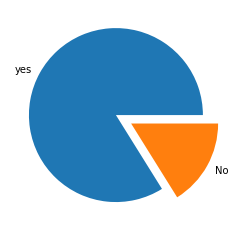

In [11]:
plt.pie(data['Attrition'].value_counts(),labels = ['yes','No'], explode =(0,.20))

From the above graph we can see that maximum employess are still working with the complany and most of them are attrited which is 237

<AxesSubplot:xlabel='Attrition', ylabel='count'>

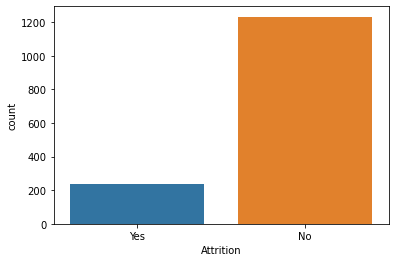

In [12]:
sns.countplot(data["Attrition"])

Above is the graphical representation of the employess attrited(blue) and currently working(orange). We can see that the data is not equal and having huge gap, which means that we need to balalnce our dataset.  

<AxesSubplot:xlabel='Department', ylabel='count'>

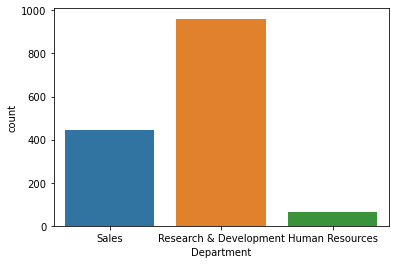

In [13]:
sns.countplot(data["Department"])

From the above graph we can check that R&D have maximum value means most of the employess are working with R&D and then in sales and then in HR

'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'

<function matplotlib.pyplot.show(close=None, block=None)>

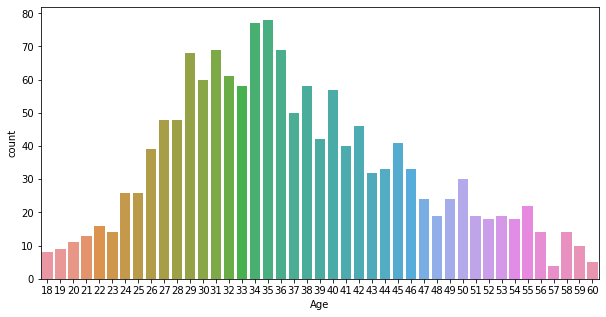

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data["Age"])
plt.show

We can see that maximum employess which we have are from 30 -35 age group.

<function matplotlib.pyplot.show(close=None, block=None)>

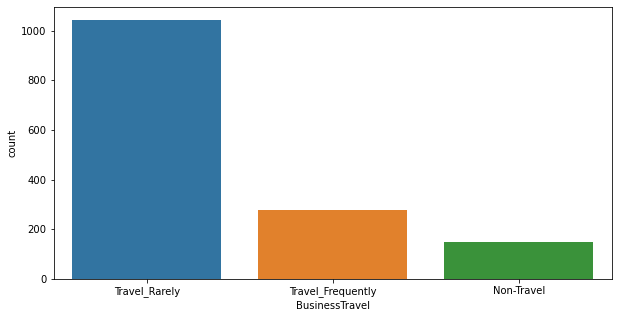

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data["BusinessTravel"])
plt.show

From the above graph we can say most of the employess approx=1000, have travelled rarely and some of them approx= 300, have travelled frequently and around 200 have never travelled

<function matplotlib.pyplot.show(close=None, block=None)>

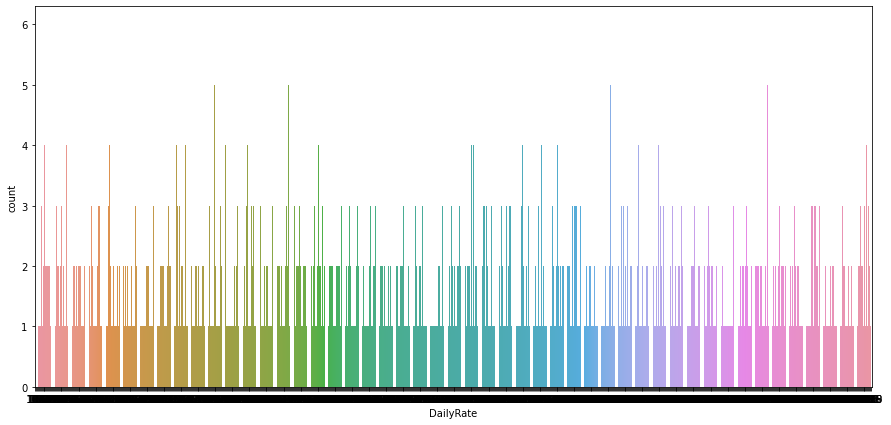

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(data["DailyRate"])
plt.show

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

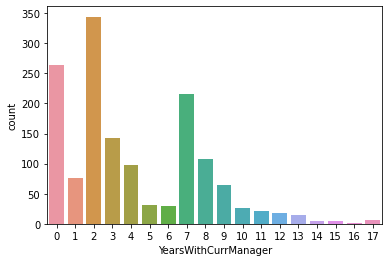

In [17]:
sns.countplot(data["YearsWithCurrManager"])

<AxesSubplot:xlabel='JobLevel', ylabel='Attrition'>

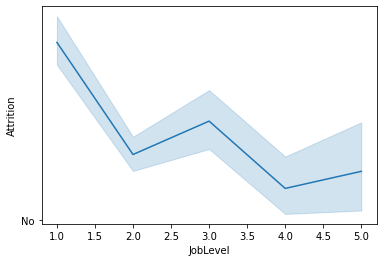

In [18]:
sns.lineplot(x='JobLevel',y='Attrition',data=data)

The above graphs represents that people at high level are not getting attrited as compared to the people at lower level

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

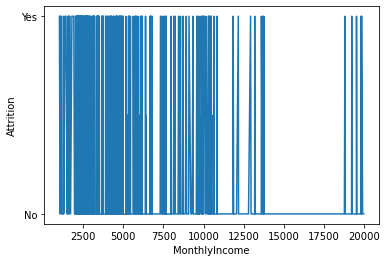

In [19]:
sns.lineplot(x='MonthlyIncome',y='Attrition',data=data)

The graph represent the data between the monthly income and attrition and we can say gthat monthly income doesn't have any signficance with the attrition. Employee with lower salary are getting attrited and higher salary as well getting attrited.

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

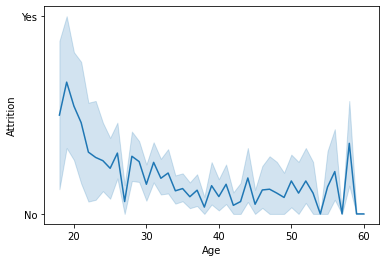

In [20]:
sns.lineplot(x='Age',y='Attrition',data=data)

Employees of lower age are getting attrited as compares to gthe employess at higher age. 

<AxesSubplot:xlabel='EmployeeCount', ylabel='Attrition'>

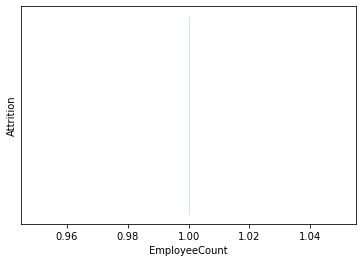

In [21]:
sns.lineplot(x='EmployeeCount',y='Attrition',data=data)

The above graph shows the relation of employee count and attrition and we can say that this column doesn't have much significance for the attrition columns. So, we can drop this column, will check more in heatmap

AxesSubplot(0.125,0.125;0.775x0.755)


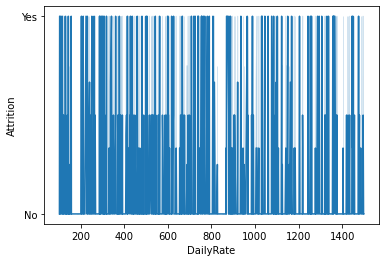

In [22]:
print(sns.lineplot(x='DailyRate',y='Attrition',data=data))

The daily rate column and attrition columns are not that much related what we can say from the above ghraph. Every rate group are attrited hence we can say that daily rate doesn't have any significance in attrition. 

AxesSubplot(0.125,0.125;0.775x0.755)


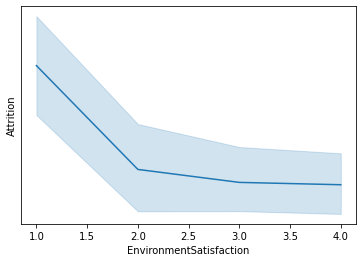

In [23]:
print(sns.lineplot(x='EnvironmentSatisfaction',y='Attrition',data=data))

We can see most of the attrition are due to unsatisfaction of the environment of the organization. We can say that Environment satisfaction is playing a major role in attritions. 

AxesSubplot(0.125,0.125;0.775x0.755)


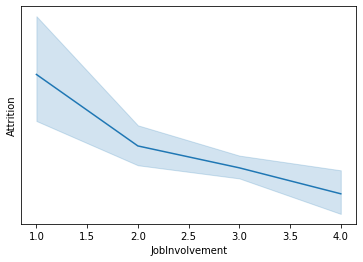

In [24]:
print(sns.lineplot(x='JobInvolvement',y='Attrition',data=data))

People who are not that much involve in their job are getting attrited. 

AxesSubplot(0.125,0.125;0.775x0.755)


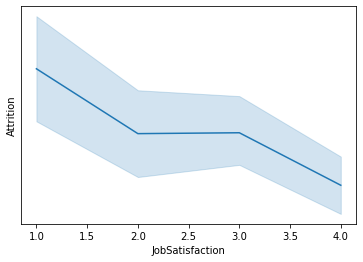

In [25]:
print(sns.lineplot(x='JobSatisfaction',y='Attrition',data=data))

We can say that employeee that are not satisfied with their job are getting attrited from tge organization.

AxesSubplot(0.125,0.125;0.775x0.755)


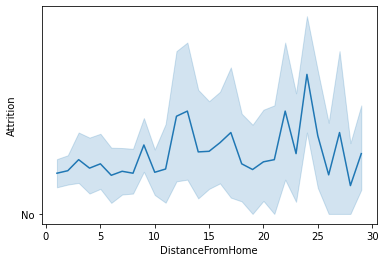

In [26]:
print(sns.lineplot(x='DistanceFromHome',y='Attrition',data=data))

We can say that employess leavig far from the organization facing issues and getting attrited because of the distanc or travelling

AxesSubplot(0.125,0.125;0.775x0.755)


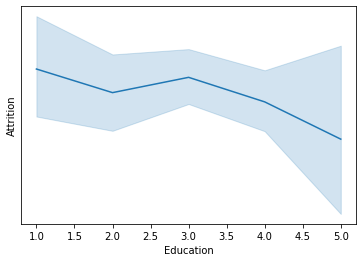

In [27]:

print(sns.lineplot(x='Education',y='Attrition',data=data))

Employee who are less educated for the profile are getting attrited from the organization

<function matplotlib.pyplot.show(close=None, block=None)>

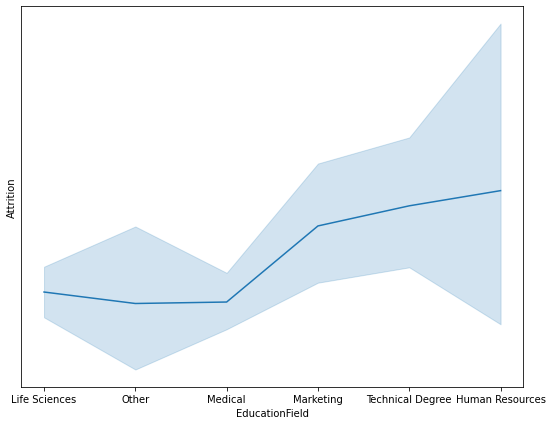

In [28]:
plt.figure(figsize =(9,7))
sns.lineplot(x='EducationField',y='Attrition',data=data)
plt.show

From the above graph we can say that employess having marketing, techincal degree and HR as their educaiton feild leaving the organization mostly as compared to the employees from life science, others and medical background

AxesSubplot(0.125,0.125;0.775x0.755)


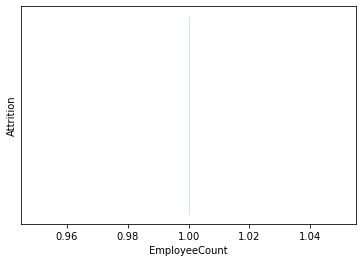

In [29]:
print(sns.lineplot(x='EmployeeCount',y='Attrition',data=data))

The above graph states the employee count in the organization, doesn't have any relation to attrition columns. 

AxesSubplot(0.125,0.125;0.775x0.755)


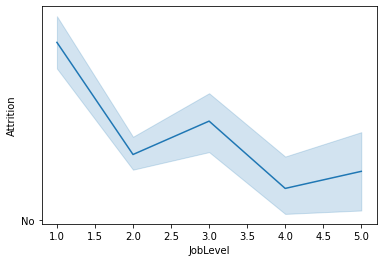

In [30]:
print(sns.lineplot(x='JobLevel',y='Attrition',data=data))

The employess having low job level leaving the organization the most

AxesSubplot(0.125,0.125;0.775x0.755)


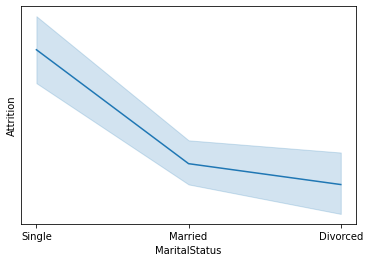

In [31]:
print(sns.lineplot(x='MaritalStatus',y='Attrition',data=data))

Employees who are married or divorced having los attrition rate compared to the singles joining the organization.

AxesSubplot(0.125,0.125;0.775x0.755)


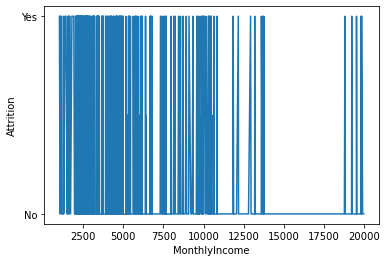

In [32]:
print(sns.lineplot(x='MonthlyIncome',y='Attrition',data=data))

We can that employees from all the income group can be attrited or leave the organizaiton. Hence this column doesn't contributes much to thge Label

AxesSubplot(0.125,0.125;0.775x0.755)


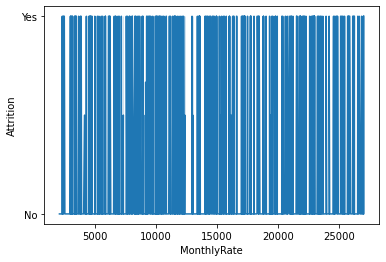

In [33]:
print(sns.lineplot(x='MonthlyRate',y='Attrition',data=data))

We can that employees from all monthly salary range can be attrited or leave the organizaiton. Hence this column doesn't contributes much to thge Label

AxesSubplot(0.125,0.125;0.775x0.755)


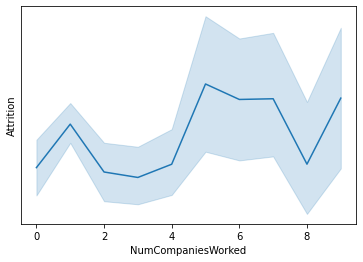

In [34]:
print(sns.lineplot(x='NumCompaniesWorked',y='Attrition',data=data))

It seems that employess with high experience level are leaving the organization the most

AxesSubplot(0.125,0.125;0.775x0.755)


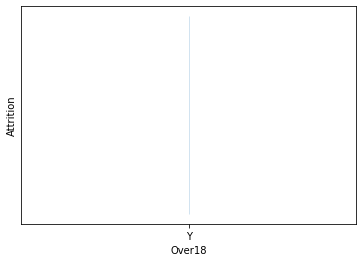

In [35]:
print(sns.lineplot(x='Over18',y='Attrition',data=data))

Thie graph suggests that every age group over 18 is being attrited so this column too doesn't signifies much

AxesSubplot(0.125,0.125;0.775x0.755)


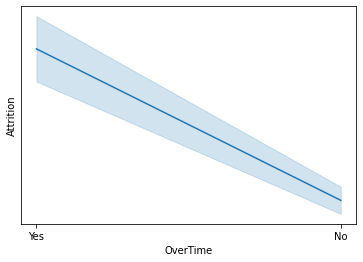

In [36]:
print(sns.lineplot(x='OverTime',y='Attrition',data=data))

Employess who have been called for an OT are leaving the organization most. 

AxesSubplot(0.125,0.125;0.775x0.755)


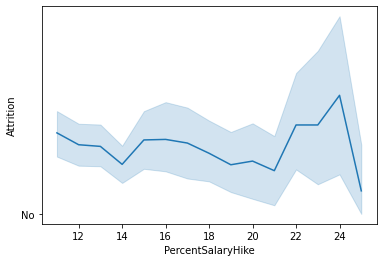

In [37]:
print(sns.lineplot(x='PercentSalaryHike',y='Attrition',data=data))

Ww can see that the more the employess getting hikes the more they are leaving the organization.

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in col1:
    if data[i].dtype == object:
        data[i] = le.fit_transform(data[i])

As we can see that out datat set is having few values as object datatype so we are converting the same to numeric form.  

In [39]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [40]:
col1

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

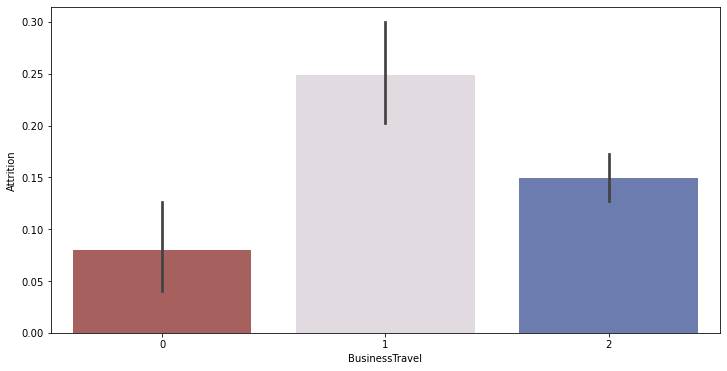

In [41]:
plt.figure(figsize = (12,6))
sns.barplot(x='BusinessTravel',y='Attrition',data = data , palette = "twilight_shifted_r")
plt.show()

From the above graph we can see that:-
   1. Travel frequently was encoded to 1, So employess travel frequently are the most one to get attrited. 
   2. Then we have employees travelled rarely(2) and a lessnumber of employess are attrited from this section. 
   3. We have least number  of attrited employess in non travelling section. 

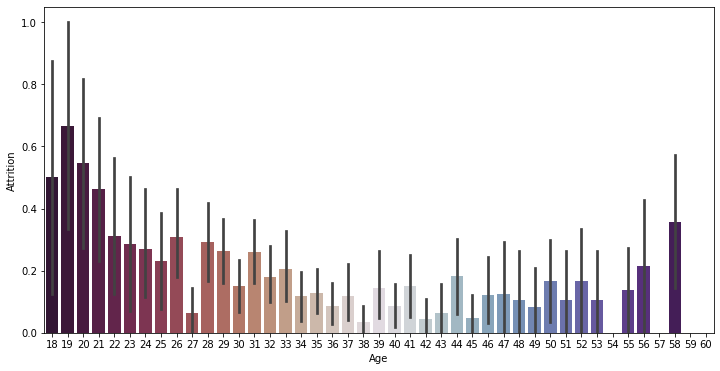

In [42]:
plt.figure(figsize = (12,6))
sns.barplot(x='Age',y='Attrition',data = data , palette = "twilight_shifted_r")
plt.show()

Employess who are lower age 18 - 20 are getting attritted mostly. 

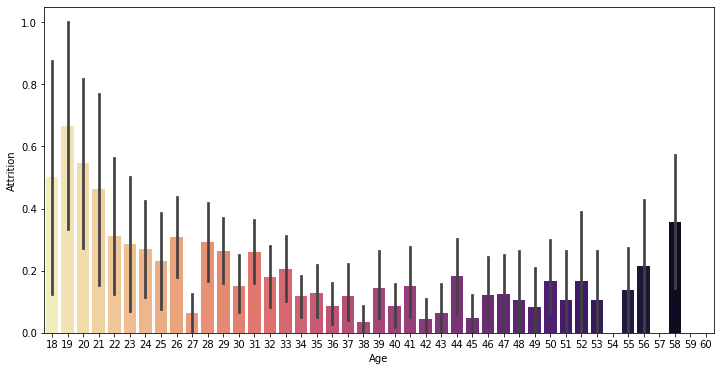

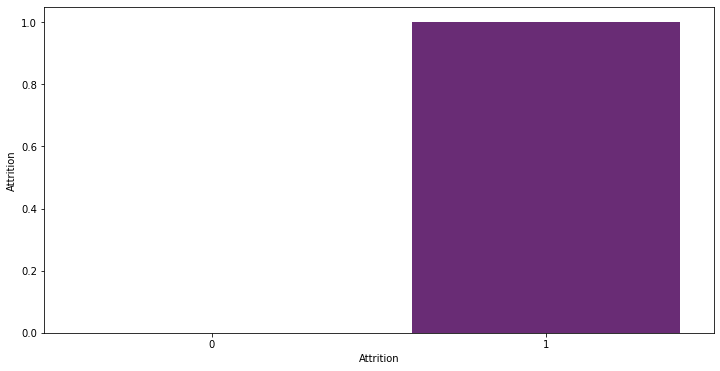

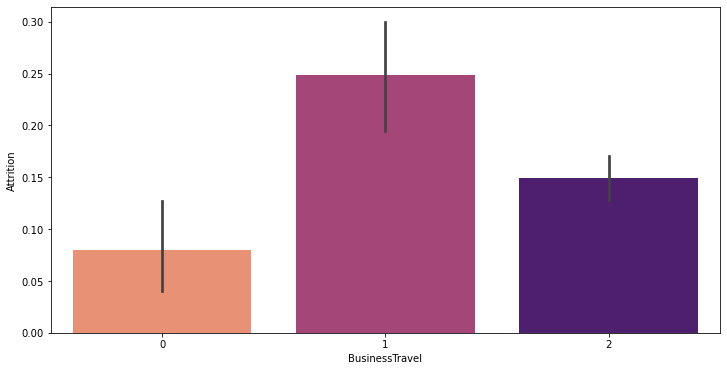

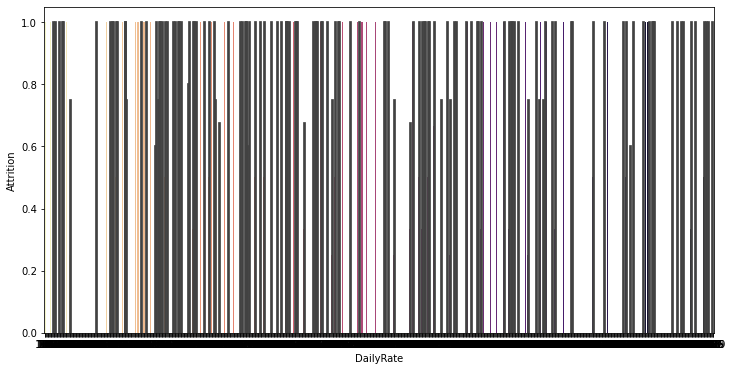

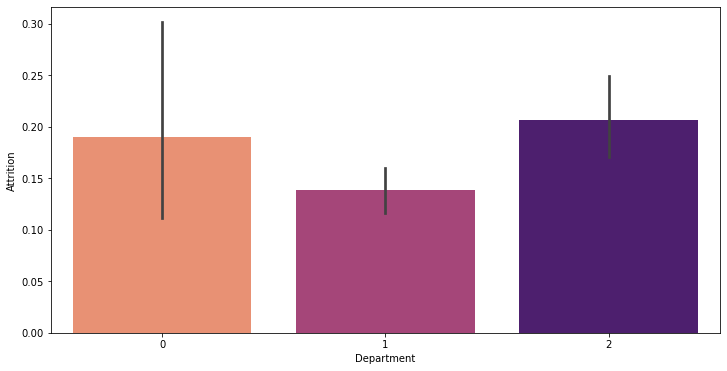

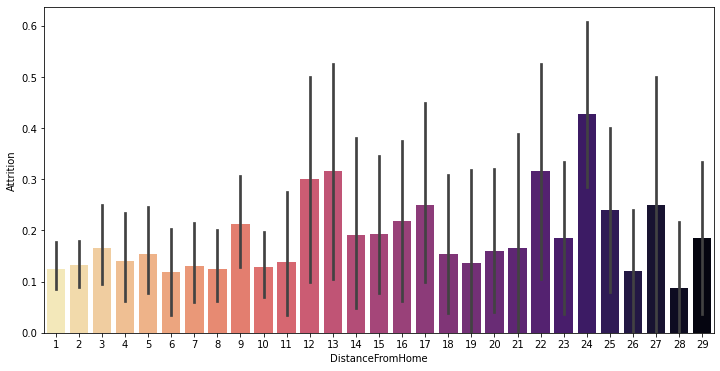

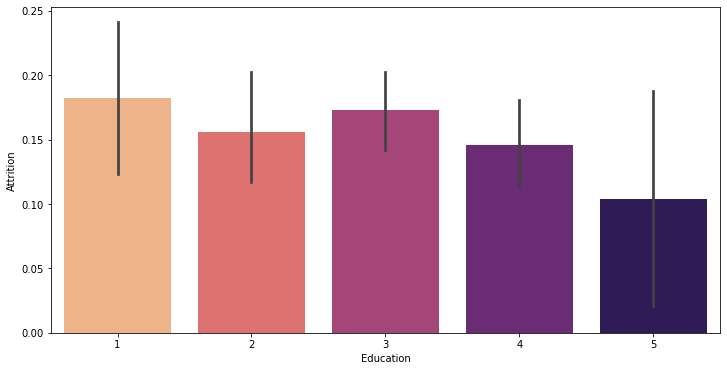

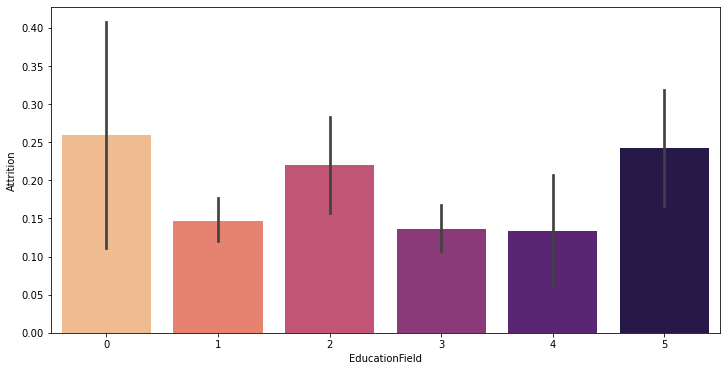

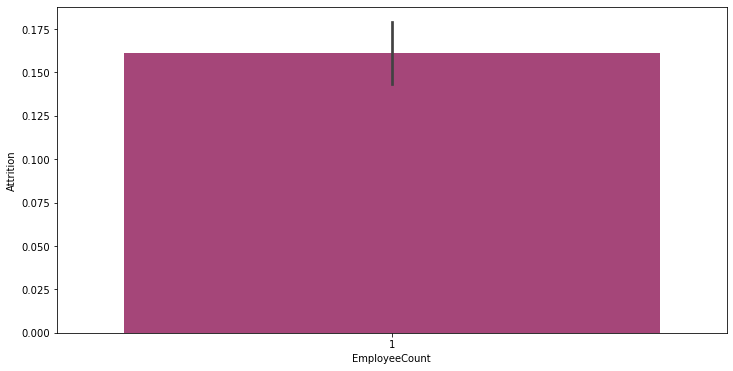

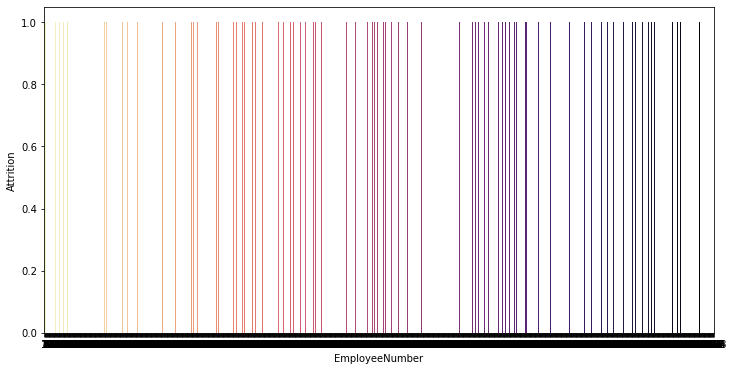

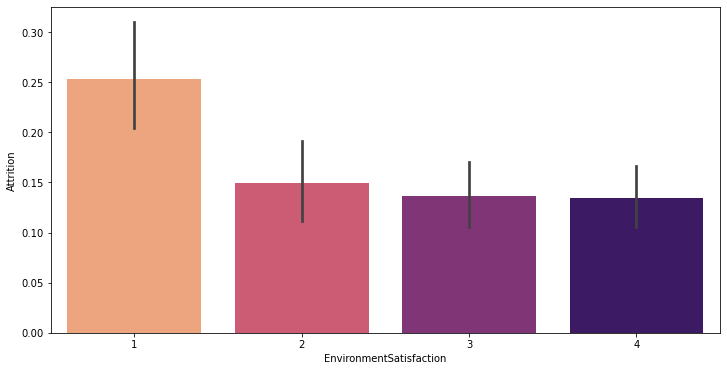

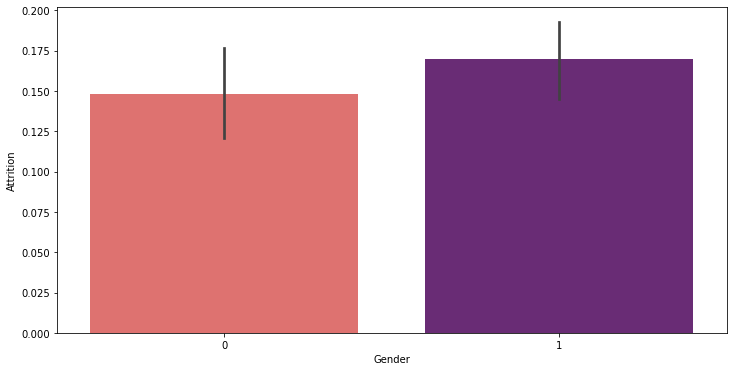

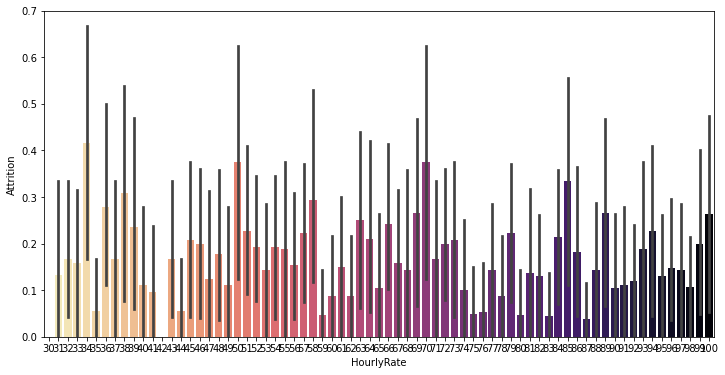

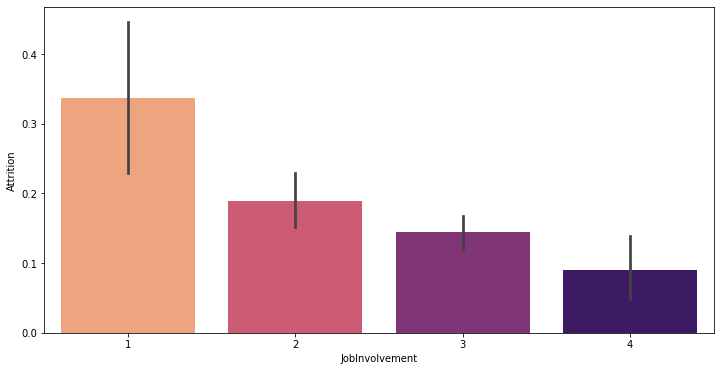

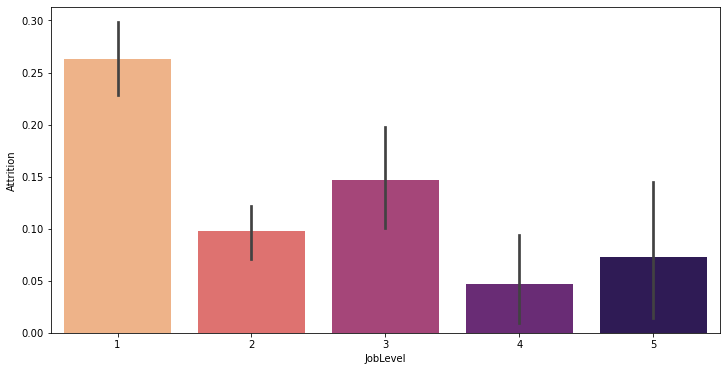

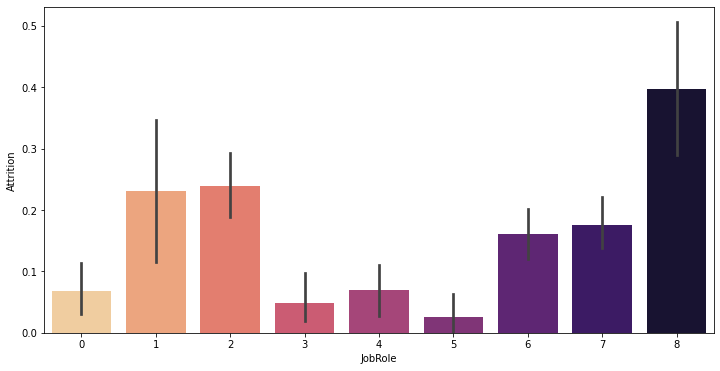

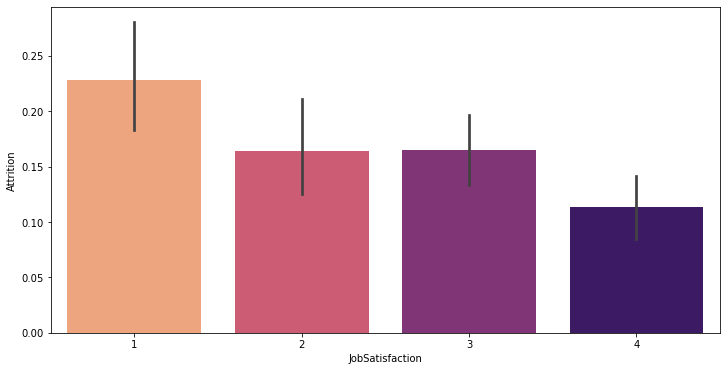

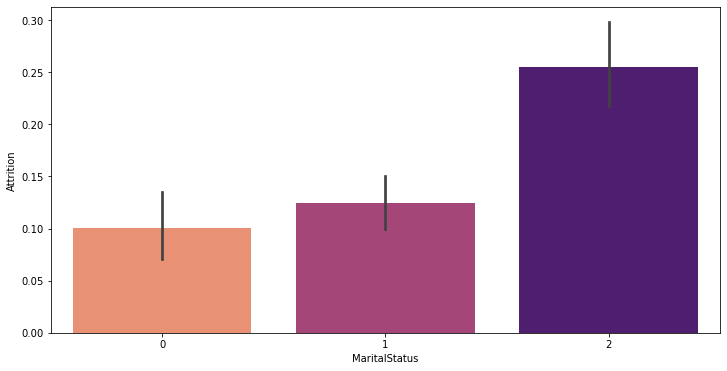

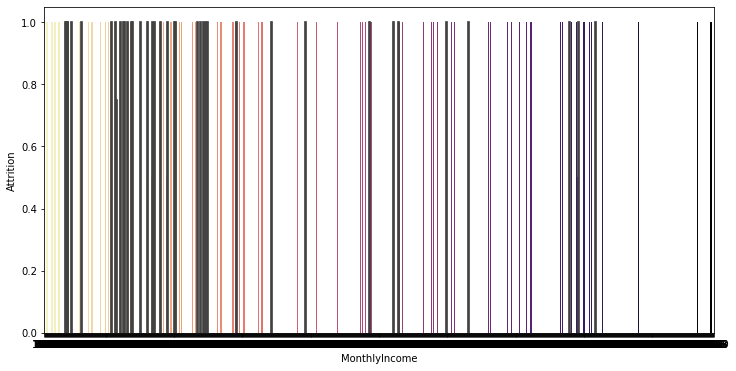

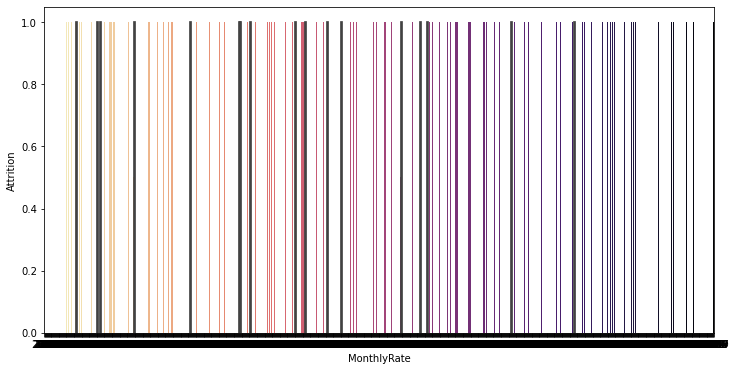

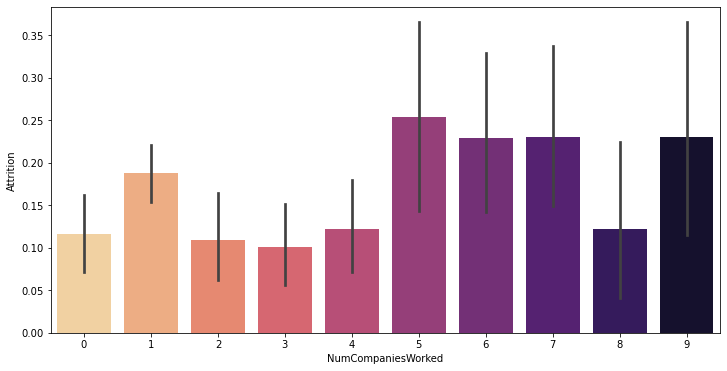

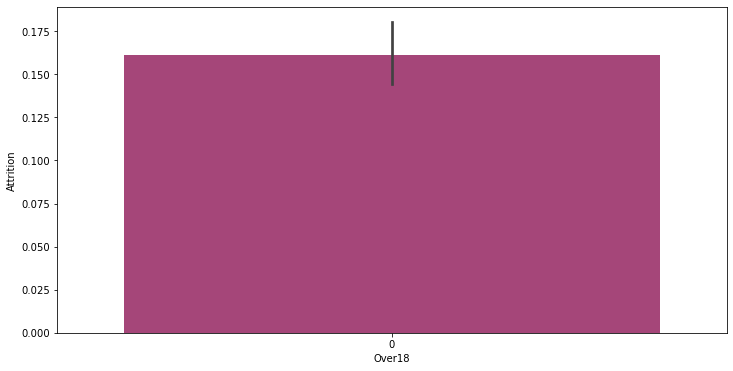

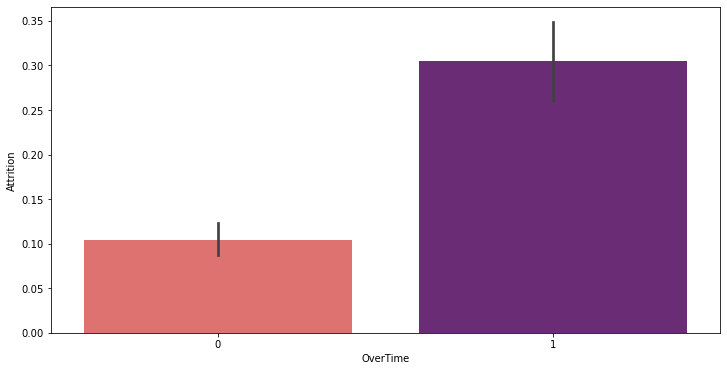

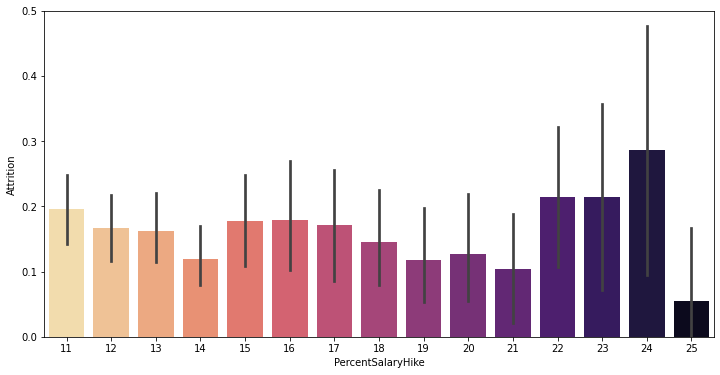

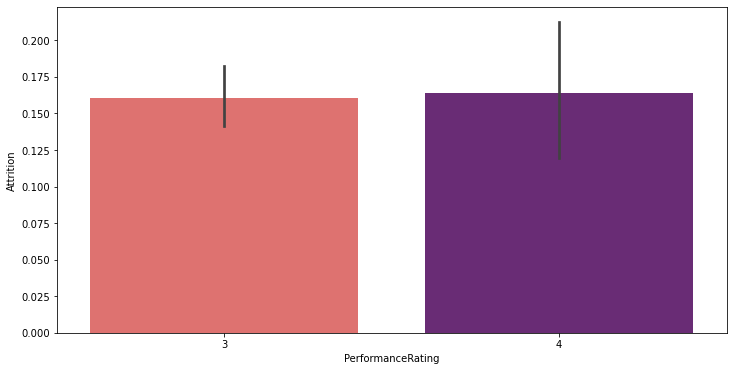

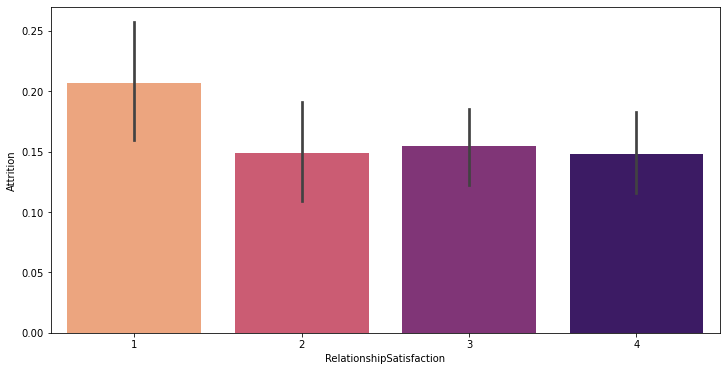

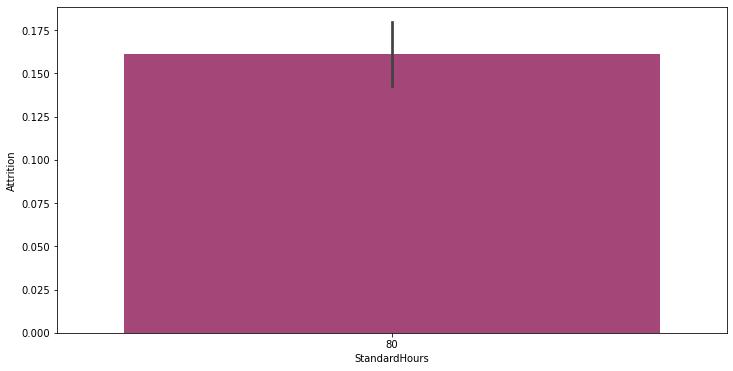

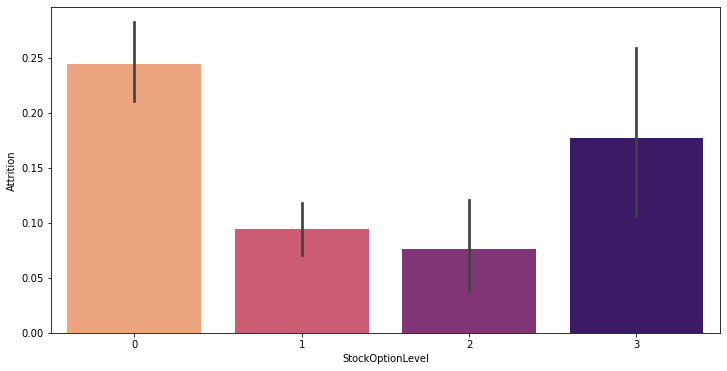

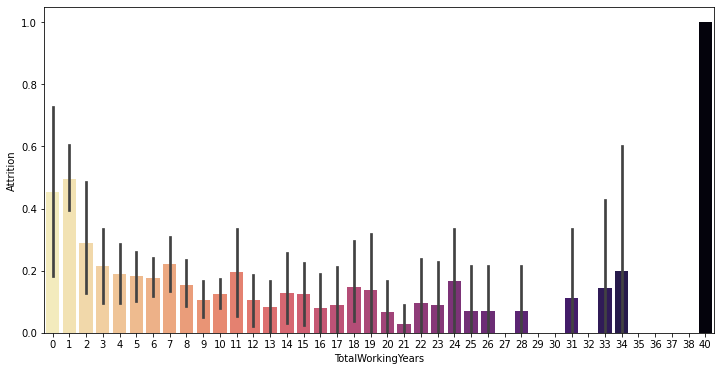

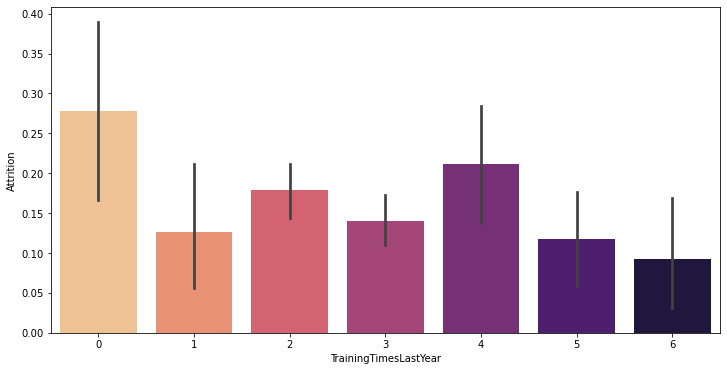

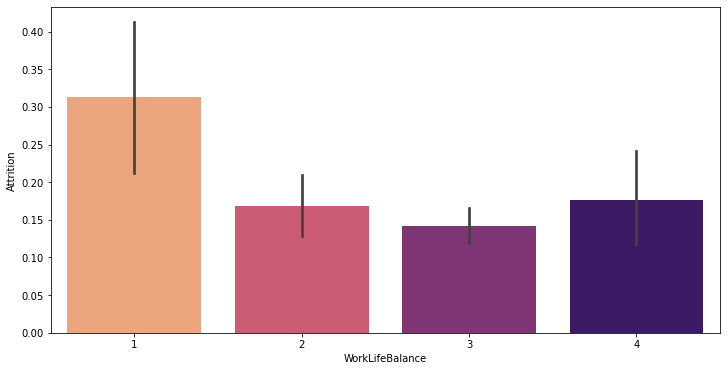

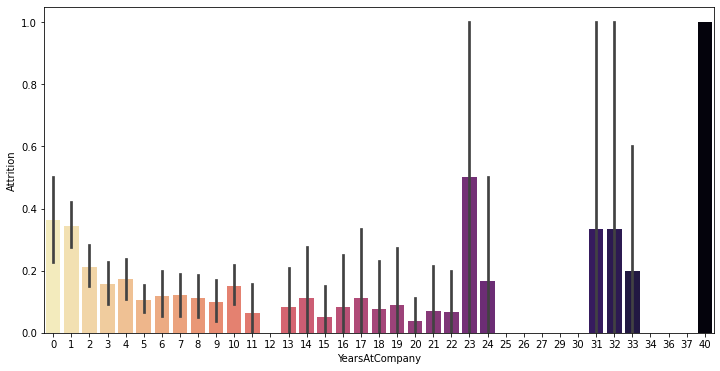

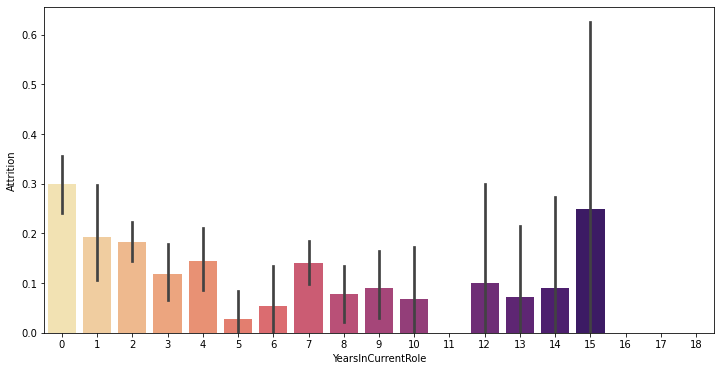

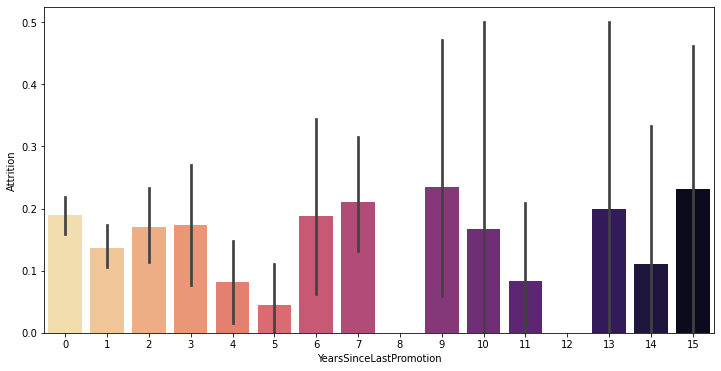

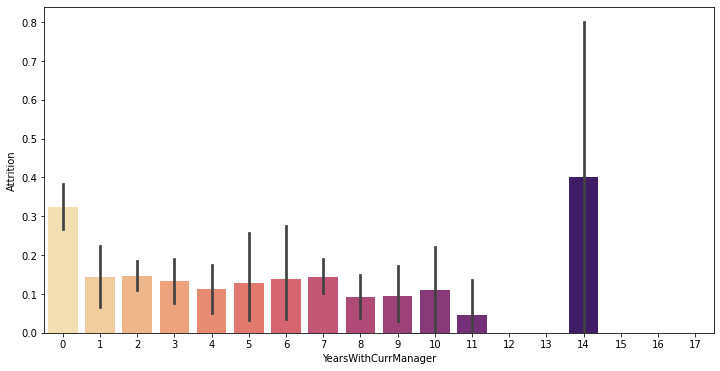

In [43]:
for i in col1:
    plt.figure(figsize = (12,6))
    sns.barplot(x = i, y = 'Attrition', data = data, palette = 'magma_r')
    plt.show()

The above is the graphical representation of relations of the all the columns with our Label Attrition. We can see that some columns like years at company
and total working years are somehow related in a same way. They both are sharing nearly the same data, means they are collinear. 

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [44]:
data['Age'].skew()

0.4132863018563338

Age
0.4132863018563338
No skewness is present


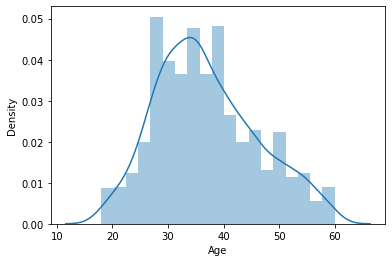

Attrition
1.8443661240010911
Column is having skewness


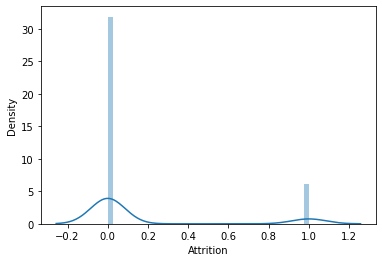

BusinessTravel
-1.4390059727642035
Column is having skewness


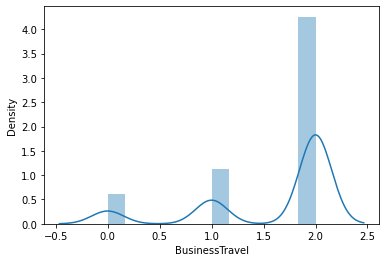

DailyRate
-0.003518568352325854
No skewness is present


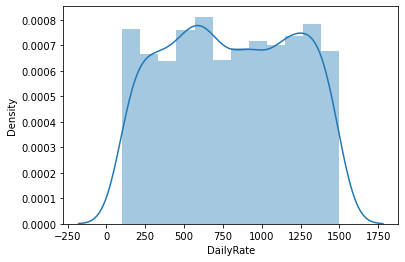

Department
0.1722308111183741
No skewness is present


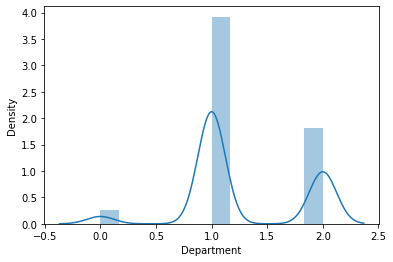

DistanceFromHome
0.9581179956568269
Column is having skewness


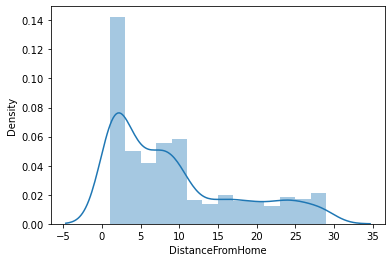

Education
-0.2896810819684331
No skewness is present


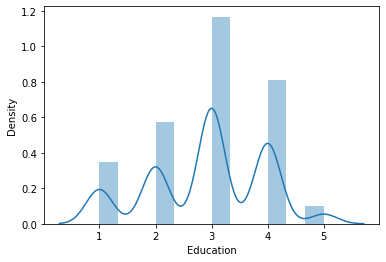

EducationField
0.5503712491120529
Column is having skewness


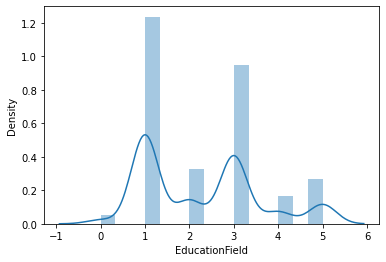

EmployeeCount
0
No skewness is present


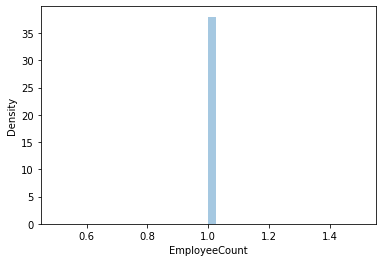

EmployeeNumber
0.016574019580105036
No skewness is present


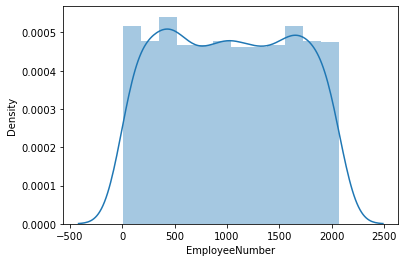

EnvironmentSatisfaction
-0.32165444773937907
No skewness is present


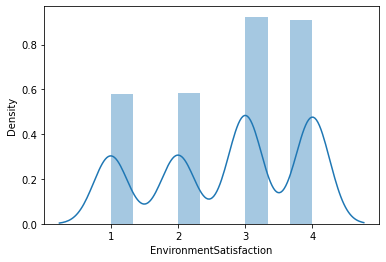

Gender
-0.4086654142437622
No skewness is present


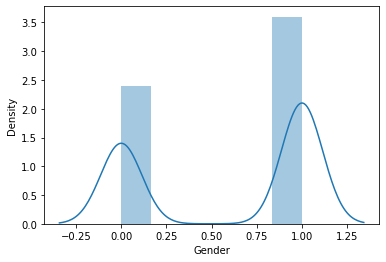

HourlyRate
-0.03231095290044942
No skewness is present


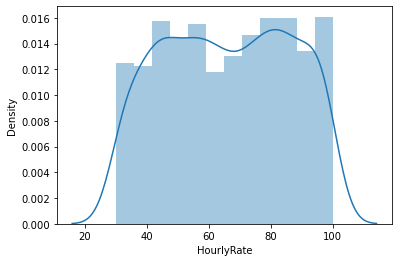

JobInvolvement
-0.4984193640419493
No skewness is present


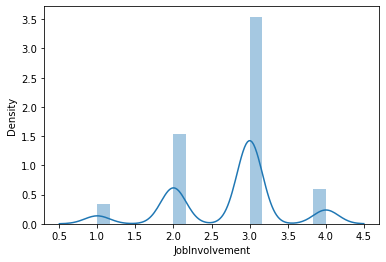

JobLevel
1.0254012829518246
Column is having skewness


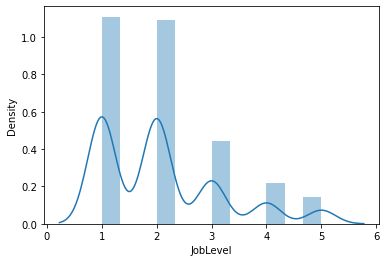

JobRole
-0.3572699195636241
No skewness is present


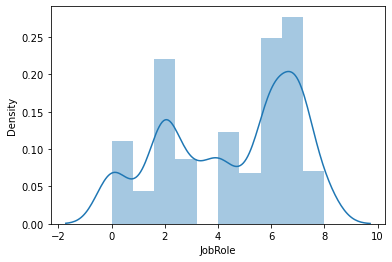

JobSatisfaction
-0.3296719586636647
No skewness is present


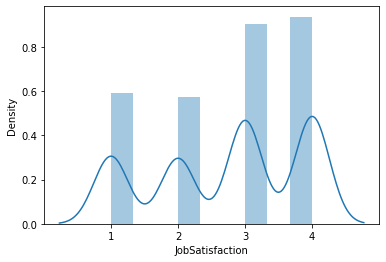

MaritalStatus
-0.1521746207726309
No skewness is present


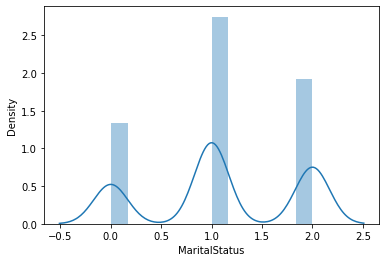

MonthlyIncome
1.3698166808390662
Column is having skewness


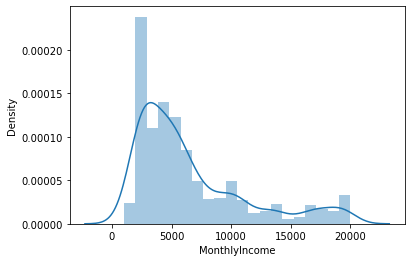

MonthlyRate
0.018577807891132458
No skewness is present


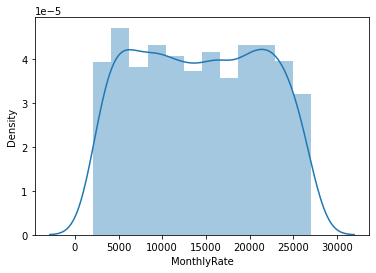

NumCompaniesWorked
1.026471111968205
Column is having skewness


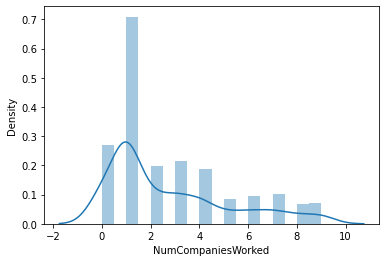

Over18
0
No skewness is present


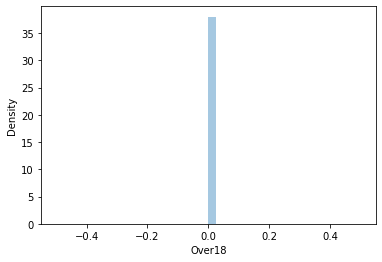

OverTime
0.9644888640425097
Column is having skewness


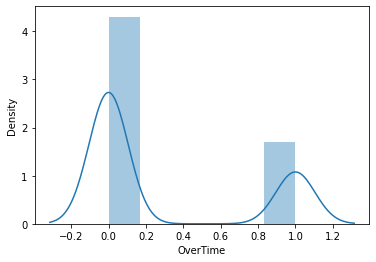

PercentSalaryHike
0.8211279755780908
Column is having skewness


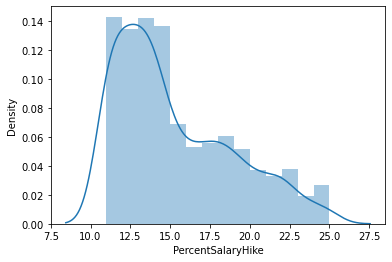

PerformanceRating
1.921882702142603
Column is having skewness


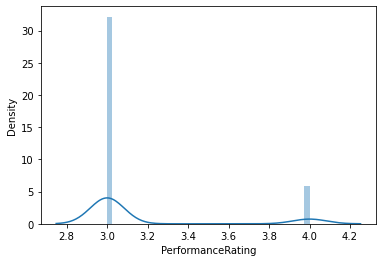

RelationshipSatisfaction
-0.30282756517072296
No skewness is present


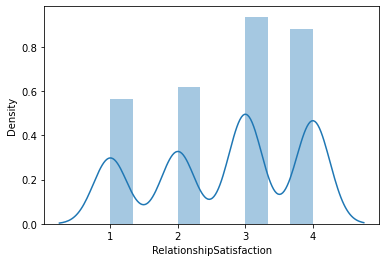

StandardHours
0
No skewness is present


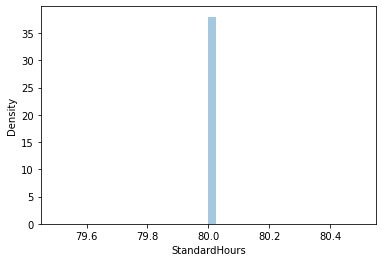

StockOptionLevel
0.9689803167738937
Column is having skewness


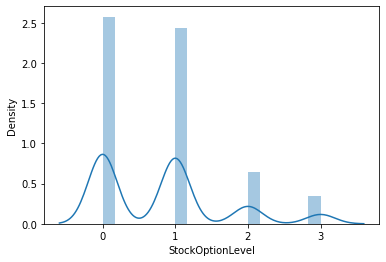

TotalWorkingYears
1.1171718528128527
Column is having skewness


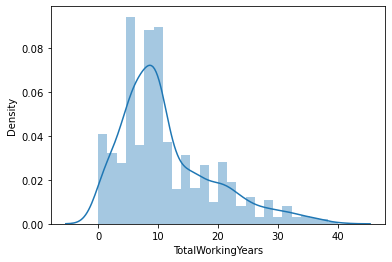

TrainingTimesLastYear
0.5531241710537028
Column is having skewness


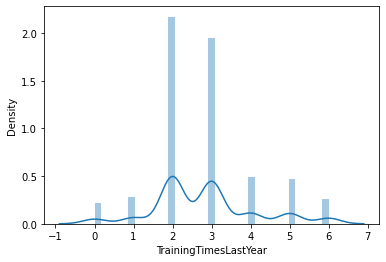

WorkLifeBalance
-0.5524802990965146
Column is having skewness


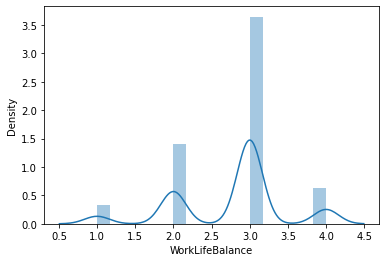

YearsAtCompany
1.7645294543422085
Column is having skewness


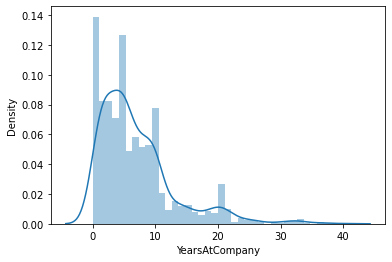

YearsInCurrentRole
0.9173631562908262
Column is having skewness


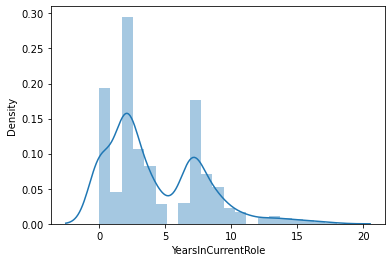

YearsSinceLastPromotion
1.9842899833524859
Column is having skewness


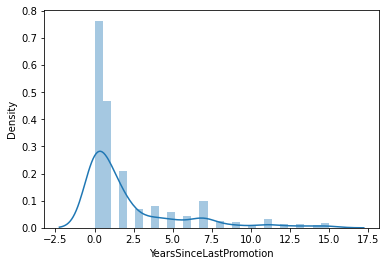

YearsWithCurrManager
0.8334509919918475
Column is having skewness


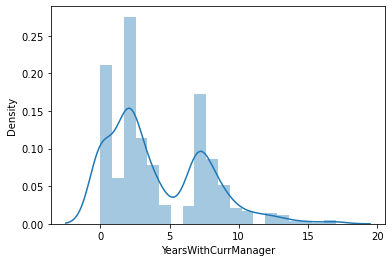

In [45]:
for col in data:
    print(col)
    print(data[col].skew())
    if (data[col].skew() > 0.55 or data[col].skew() < -0.55): 
        print("Column is having skewness")
    else:
        print("No skewness is present")
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

The above is the graphical representation hoiw the data is distributed among every column in our dataset. We can see that our dataset is skewed as all the graphs are not normal bell curve. 

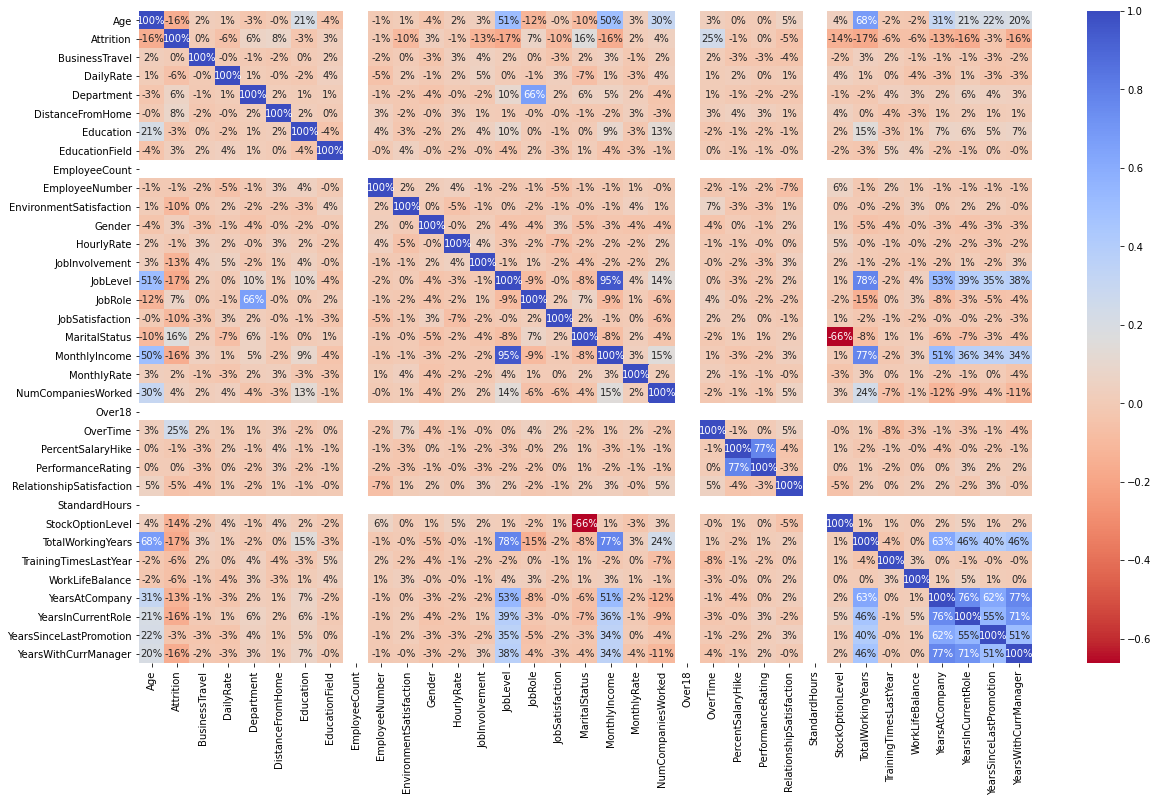

In [46]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot =True,cmap ='coolwarm_r',fmt='.0%')
plt.show()

We can see that:-
1. Few columns(x) are corelated with other columns(x), which states that we have multicolinearity in our dataset. 
   EG:- Age, job level, Monthly income, total working years, years at company, years at current role, years since last promotion, years with cutrrent manager. Also, these columns are having a negative corelation with our label. So, we can drop these columns.  
2. Employee count, over 18, performance rating, standard hours are not related with attrition

In [47]:
col1

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return (vif)

In [49]:
calc_vif(data)

,Variables,VIF Factor
0,Age,2.066239
1,Attrition,1.273737
2,BusinessTravel,1.016808
3,DailyRate,1.028070
4,Department,1.950476
5,DistanceFromHome,1.025676
6,Education,1.065295
7,EducationField,1.016743
8,EmployeeCount,0.000000
9,EmployeeNumber,1.022974


In [50]:
data.drop('EmployeeCount',axis=1,inplace=True)
data.drop('EmployeeNumber',axis=1,inplace=True)
data.drop('Over18',axis=1,inplace=True)
data.drop('MonthlyRate',axis=1,inplace=True)
data.drop('MonthlyIncome',axis=1,inplace=True)
data.drop('DailyRate',axis=1,inplace=True)
data.drop('StandardHours',axis=1,inplace=True)

In [51]:
data.drop('PerformanceRating',axis=1,inplace=True)

In [52]:
#data.drop('DailyRate',axis=1,inplace=True)

In [53]:
#data.drop('EnvironmentSatisfaction',axis=1,inplace=True)

In [54]:
#data.drop('JobInvolvement',axis=1,inplace=True)
#data.drop('JobLevel',axis=1,inplace=True)
#data.drop('JobSatisfaction',axis=1,inplace=True)

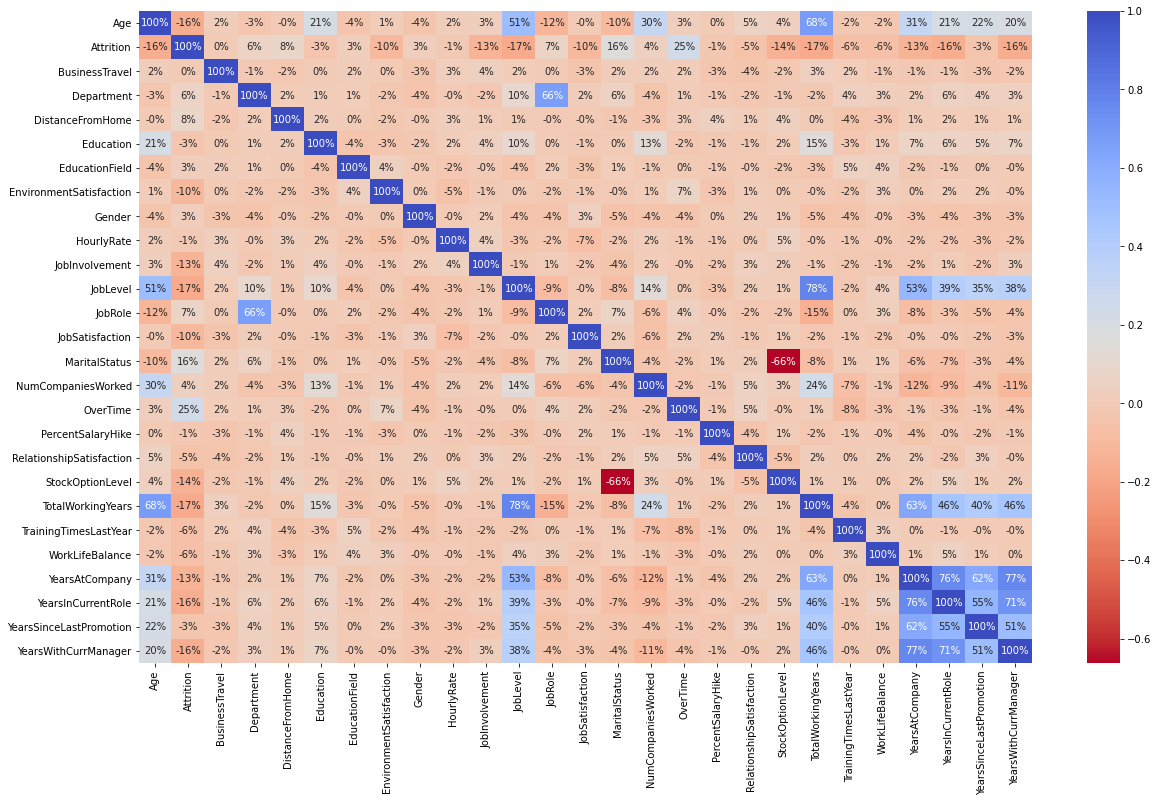

In [55]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot =True,cmap ='coolwarm_r',fmt='.0%')
plt.show()

In [56]:
data.shape

(1470, 27)

Age                            AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Attrition                   AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
BusinessTravel              AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Department                  AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
DistanceFromHome            AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Education                   AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
EducationField              AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
EnvironmentSatisfaction        AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Gender                      AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
HourlyRate                  AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
JobInvolvement              AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
JobLevel                    AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
JobRole                     AxesSubplot(0.692073,0.593621;0.0945

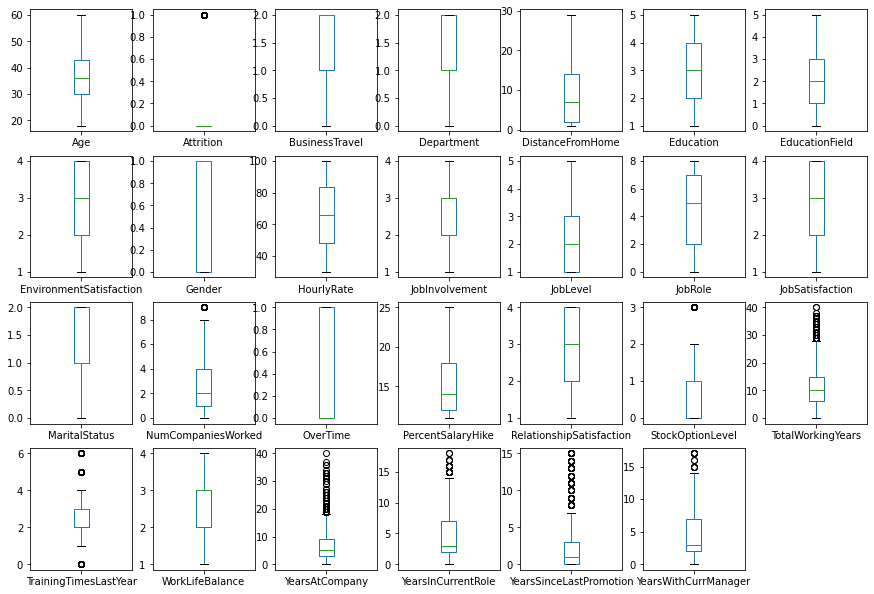

In [57]:
data.plot(kind='box',subplots=True, layout=(5,7), figsize = (15,13))
#data.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

We plotted the box plot and we csan check that we are having several outliers in our data set. We can see that our dataset doesn't have any outliers right now. 

from scipy.stats import zscore
zscore = np.abs(zscore(data))

threshold = 3
print(np.where(zscore>3))

data_new = data[(zscore<3).all(axis=1)]

25 quartile of is: 1.0
75 quartile of is: 4.0
The IQR value is: 3.0
The high value is 8.5
The low value is -3.5


NumCompaniesWorked    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

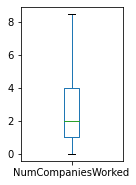

In [58]:
#NumCompaniesWorked
q1 = data['NumCompaniesWorked'].quantile(.25)
q3 = data['NumCompaniesWorked'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['NumCompaniesWorked'] > high_range]) 
(data[data['NumCompaniesWorked'] < low_range])

data['NumCompaniesWorked'] = np.where(
    data['NumCompaniesWorked'] > high_range,
    high_range,
    np.where(
        data['NumCompaniesWorked'] < low_range,
        low_range,
        data['NumCompaniesWorked']
    )
)

data['NumCompaniesWorked'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))


q1 = data['PerformanceRating'].quantile(.25)
q3 = data['PerformanceRating'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['PerformanceRating'] > high_range]) 
(data[data['PerformanceRating'] < low_range])

data['PerformanceRating'] = np.where(
    data['PerformanceRating'] > high_range,
    high_range,
    np.where(
        data['PerformanceRating'] < low_range,
        low_range,
        data['PerformanceRating']
    )
)

data['PerformanceRating'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))



25 quartile of is: 0.0
75 quartile of is: 1.0
The IQR value is: 1.0
The high value is 2.5
The low value is -1.5


StockOptionLevel    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

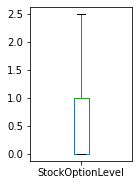

In [59]:
q1 = data['StockOptionLevel'].quantile(.25)
q3 = data['StockOptionLevel'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['StockOptionLevel'] > high_range]) 
(data[data['StockOptionLevel'] < low_range])

data['StockOptionLevel'] = np.where(
    data['StockOptionLevel'] > high_range,
    high_range,
    np.where(
        data['StockOptionLevel'] < low_range,
        low_range,
        data['StockOptionLevel']
    )
)

data['StockOptionLevel'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))


25 quartile of is: 6.0
75 quartile of is: 15.0
The IQR value is: 9.0
The high value is 28.5
The low value is -7.5


TotalWorkingYears    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

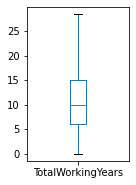

In [60]:

q1 = data['TotalWorkingYears'].quantile(.25)
q3 = data['TotalWorkingYears'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['TotalWorkingYears'] > high_range]) 
(data[data['TotalWorkingYears'] < low_range])

data['TotalWorkingYears'] = np.where(
    data['TotalWorkingYears'] > high_range,
    high_range,
    np.where(
        data['TotalWorkingYears'] < low_range,
        low_range,
        data['TotalWorkingYears']
    )
)

data['TotalWorkingYears'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 2.0
75 quartile of is: 3.0
The IQR value is: 1.0
The high value is 4.5
The low value is 0.5


TrainingTimesLastYear    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

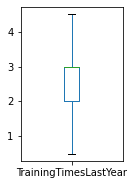

In [61]:

q1 = data['TrainingTimesLastYear'].quantile(.25)
q3 = data['TrainingTimesLastYear'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['TrainingTimesLastYear'] > high_range]) 
(data[data['TrainingTimesLastYear'] < low_range])

data['TrainingTimesLastYear'] = np.where(
    data['TrainingTimesLastYear'] > high_range,
    high_range,
    np.where(
        data['TrainingTimesLastYear'] < low_range,
        low_range,
        data['TrainingTimesLastYear']
    )
)

data['TrainingTimesLastYear'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 3.0
75 quartile of is: 9.0
The IQR value is: 6.0
The high value is 18.0
The low value is -6.0


YearsAtCompany    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

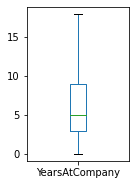

In [62]:
q1 = data['YearsAtCompany'].quantile(.25)
q3 = data['YearsAtCompany'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['YearsAtCompany'] > high_range]) 
(data[data['YearsAtCompany'] < low_range])

data['YearsAtCompany'] = np.where(
    data['YearsAtCompany'] > high_range,
    high_range,
    np.where(
        data['YearsAtCompany'] < low_range,
        low_range,
        data['YearsAtCompany']
    )
)

data['YearsAtCompany'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 2.0
75 quartile of is: 7.0
The IQR value is: 5.0
The high value is 14.5
The low value is -5.5


YearsInCurrentRole    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

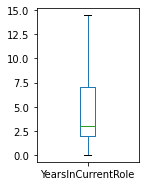

In [63]:


q1 = data['YearsInCurrentRole'].quantile(.25)
q3 = data['YearsInCurrentRole'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['YearsInCurrentRole'] > high_range]) 
(data[data['YearsInCurrentRole'] < low_range])

data['YearsInCurrentRole'] = np.where(
    data['YearsInCurrentRole'] > high_range,
    high_range,
    np.where(
        data['YearsInCurrentRole'] < low_range,
        low_range,
        data['YearsInCurrentRole']
    )
)

data['YearsInCurrentRole'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.0
75 quartile of is: 3.0
The IQR value is: 3.0
The high value is 7.5
The low value is -4.5


YearsSinceLastPromotion    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

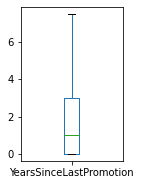

In [64]:
q1 = data['YearsSinceLastPromotion'].quantile(.25)
q3 = data['YearsSinceLastPromotion'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['YearsSinceLastPromotion'] > high_range]) 
(data[data['YearsSinceLastPromotion'] < low_range])

data['YearsSinceLastPromotion'] = np.where(
    data['YearsSinceLastPromotion'] > high_range,
    high_range,
    np.where(
        data['YearsSinceLastPromotion'] < low_range,
        low_range,
        data['YearsSinceLastPromotion']
    )
)

data['YearsSinceLastPromotion'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 2.0
75 quartile of is: 7.0
The IQR value is: 5.0
The high value is 14.5
The low value is -5.5


YearsWithCurrManager    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

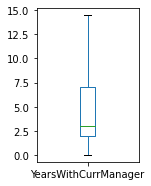

In [65]:
q1 = data['YearsWithCurrManager'].quantile(.25)
q3 = data['YearsWithCurrManager'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)
iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


(data[data['YearsWithCurrManager'] > high_range]) 
(data[data['YearsWithCurrManager'] < low_range])

data['YearsWithCurrManager'] = np.where(
    data['YearsWithCurrManager'] > high_range,
    high_range,
    np.where(
        data['YearsWithCurrManager'] < low_range,
        low_range,
        data['YearsWithCurrManager']
    )
)
data['YearsWithCurrManager'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

Abive we have removed the outliers using IQR method from the columns

In [68]:
data['Age_new'] = data['Age']

In [69]:
data.drop('Age',axis=1,inplace=True)

In [70]:
data.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_new
0,1,2,2,1,2,1,2,0,94,3,...,1,0.0,8.0,0.5,1,6.0,4.0,0.0,5.0,41
1,0,1,1,8,1,1,3,1,61,2,...,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0,49
2,1,2,1,2,2,4,4,1,92,2,...,2,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0,37
3,0,1,1,3,4,1,4,0,56,3,...,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0,33
4,0,2,1,2,1,3,1,1,40,3,...,4,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0,27


In order to split orn dataset for ML we have moved the age from starting to end with the same data so that we can easily split the X and Y to feed for training and testing. 

In [71]:
x = data.iloc[:,1:27]
x.head()

,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_new
0,2,2,1,2,1,2,0,94,3,2,...,1,0.0,8.0,0.5,1,6.0,4.0,0.0,5.0,41
1,1,1,8,1,1,3,1,61,2,2,...,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0,49
2,2,1,2,2,4,4,1,92,2,1,...,2,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0,37
3,1,1,3,4,1,4,0,56,3,1,...,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0,33
4,2,1,2,1,3,1,1,40,3,1,...,4,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0,27


In [72]:
y = data['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

We have separted our inputs and label and stored them to a variable X and Y

In [73]:
x.skew()

BusinessTravel             -1.439006
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
NumCompaniesWorked          0.971516
OverTime                    0.964489
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.664714
TotalWorkingYears           0.855518
TrainingTimesLastYear       0.117931
WorkLifeBalance            -0.552480
YearsAtCompany              0.900774
YearsInCurrentRole          0.803704
YearsSinceLastPromotion     1.262563
YearsWithCurrManager        0.741000
Age_new                     0.413286
dtype: float64

In [74]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

We can check that out imput dataset X is having some skewness so we used yeo-johnson method to remove the skewness from our dataset

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

As we have checked earlier our dataset having class imbalancing so we are using standard scaler to balance the dataset before initializing building of our model. 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

We have called necessary model and train test split to split our dataset AND build our model. 

In [96]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
rnd = RandomForestClassifier()

In [97]:
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("AT random state",i,"the model performing good")

AT random state 98 the model performing good
AT random state 149 the model performing good
AT random state 198 the model performing good
AT random state 203 the model performing good
AT random state 233 the model performing good
AT random state 250 the model performing good
AT random state 274 the model performing good
AT random state 297 the model performing good
AT random state 334 the model performing good
AT random state 356 the model performing good
AT random state 497 the model performing good


In [98]:
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size =.30,random_state = 98)

In [99]:
knn.fit(x_train,y_train)
lr.fit(x_train,y_train)
gnb.fit(x_train,y_train)
svc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
rnd.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
predict_knn = knn.predict(x_test)
predict_lr = lr.predict(x_test)
predict_gnb = gnb.predict(x_test)
predict_svc = svc.predict(x_test)
predict_dtc = dtc.predict(x_test)
predict_rnd = rnd.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,predict_knn),'\n')
print(confusion_matrix(y_test,predict_knn),'\n')
print(classification_report(y_test,predict_knn),'\n')

0.8480725623582767 

[[362   3]
 [ 64  12]] 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       365
           1       0.80      0.16      0.26        76

    accuracy                           0.85       441
   macro avg       0.82      0.57      0.59       441
weighted avg       0.84      0.85      0.80       441
 



In [102]:
print(accuracy_score(y_test,predict_lr),'\n')
print(confusion_matrix(y_test,predict_lr),'\n')
print(classification_report(y_test,predict_lr),'\n')

0.8775510204081632 

[[357   8]
 [ 46  30]] 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       365
           1       0.79      0.39      0.53        76

    accuracy                           0.88       441
   macro avg       0.84      0.69      0.73       441
weighted avg       0.87      0.88      0.86       441
 



In [103]:
print(accuracy_score(y_test,predict_svc),'\n')
print(confusion_matrix(y_test,predict_svc),'\n')
print(classification_report(y_test,predict_svc),'\n')

0.854875283446712 

[[359   6]
 [ 58  18]] 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       365
           1       0.75      0.24      0.36        76

    accuracy                           0.85       441
   macro avg       0.81      0.61      0.64       441
weighted avg       0.84      0.85      0.82       441
 



In [104]:
print(accuracy_score(y_test,predict_gnb),'\n')
print(confusion_matrix(y_test,predict_gnb),'\n')
print(classification_report(y_test,predict_gnb),'\n')

0.7981859410430839 

[[317  48]
 [ 41  35]] 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       365
           1       0.42      0.46      0.44        76

    accuracy                           0.80       441
   macro avg       0.65      0.66      0.66       441
weighted avg       0.81      0.80      0.80       441
 



In [105]:
print(accuracy_score(y_test,predict_dtc),'\n')
print(confusion_matrix(y_test,predict_dtc),'\n')
print(classification_report(y_test,predict_dtc),'\n')

0.7528344671201814 

[[310  55]
 [ 54  22]] 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       365
           1       0.29      0.29      0.29        76

    accuracy                           0.75       441
   macro avg       0.57      0.57      0.57       441
weighted avg       0.75      0.75      0.75       441
 



In [106]:
print(accuracy_score(y_test,predict_rnd),'\n')
print(confusion_matrix(y_test,predict_rnd),'\n')
print(classification_report(y_test,predict_rnd),'\n')

0.8526077097505669 

[[362   3]
 [ 62  14]] 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       365
           1       0.82      0.18      0.30        76

    accuracy                           0.85       441
   macro avg       0.84      0.59      0.61       441
weighted avg       0.85      0.85      0.81       441
 



In [107]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [108]:
from sklearn.model_selection import GridSearchCV

parameter = [{'n_neighbors':[5,10,15,20] , 'weights' : ['uniform'], 'algorithm' : ['auto']},
            {'n_neighbors':[10,20,30,40] , 'weights' : ['distance'], 'algorithm' : ['ball_tree'], 'leaf_size':[40]},
            {'n_neighbors':[2,4,6,8,10] , 'weights' : ['uniform'], 'algorithm' : ['kd_tree']},
            {'n_neighbors':[10,20,30,40],'weights':['distance'],'algorithm':['ball_tree'],'leaf_size':[40],'p':[2],'metric':['minkowski'],'n_jobs':[-1]}]

grid_search = GridSearchCV ( estimator = knn,
                            param_grid = parameter,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit(x_train,y_train)

In [109]:
accuracy = grid_search.best_score_
accuracy

0.8571197411003236

In [110]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 40,
 'n_neighbors': 10,
 'weights': 'distance'}

In [114]:
from sklearn.model_selection import cross_val_score
score_dtc=cross_val_score(knn,x,y,cv=5)
print('\n')

print(score_dtc)
print(score_dtc.mean())
print(score_dtc.std())
print('------------------------')
score_lr=cross_val_score(lr,x,y,cv=5)
print(score_lr)
print(score_lr.mean())
print(score_lr.std())
print('------------------------')
score_svc=cross_val_score(gnb,x,y,cv=5)
print(score_svc)
print(score_svc.mean())
print(score_svc.std())
print('------------------------')
score_rnd=cross_val_score(svc,x,y,cv=5)
print(score_rnd)
print(score_rnd.mean())
print(score_rnd.std())
print('------------------------')
score_rnd=cross_val_score(dtc,x,y,cv=5)
print(score_rnd)
print(score_rnd.mean())
print(score_rnd.std())
print('------------------------')
score_rnd=cross_val_score(rnd,x,y,cv=5)
print(score_rnd)
print(score_rnd.mean())
print(score_rnd.std())
print('------------------------')



[0.84353741 0.83673469 0.84353741 0.8537415  0.86394558]
0.8482993197278912
0.009523809523809485
------------------------
[0.86734694 0.86054422 0.86734694 0.86394558 0.88095238]
0.8680272108843535
0.006937441515092232
------------------------
[0.85034014 0.81292517 0.81292517 0.79591837 0.84693878]
0.8238095238095239
0.021230593924254734
------------------------
[0.86054422 0.8537415  0.87414966 0.86394558 0.8707483 ]
0.864625850340136
0.007263318538796818
------------------------
[0.80272109 0.78571429 0.78571429 0.78571429 0.76530612]
0.7850340136054421
0.01186094950623314
------------------------
[0.84353741 0.86054422 0.86394558 0.8537415  0.86734694]
0.8578231292517007
0.008441954861218242
------------------------


In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

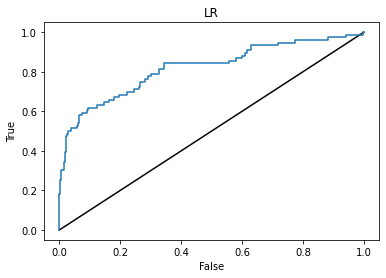

In [116]:
y_predict_prob = lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)

plt.plot([0,1],[0,1],'k')
plt.plot(fpr,tpr,label='LR')
plt.xlabel('False')
plt.ylabel('True')
plt.title('LR')
plt.show()

In [118]:
import pickle
filename = 'HR_Attrition.pkl'
pickle.dump(lr, open(filename, 'wb'))